In [ ]:
!pip install textblob
import pandas as pd
from textblob import TextBlob


In [7]:
import pandas as pd
from textblob import TextBlob

In [13]:
import pandas as pd


In [11]:
df = pd.read_csv('/content/bank_reviews3.csv')

In [15]:

df.head()


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


In [23]:
df.dropna(subset=['review', 'rating'], inplace=True)

In [24]:
df.drop_duplicates(subset=['review'], inplace=True)

In [25]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [26]:
df['Sentiment_Score'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# تصنيف المشاعر بناءً على السكور
def label_sentiment(score):
    if score > 0.1:
        return 'إيجابي'
    elif score < -0.1:
        return 'سلبي'
    else:
        return 'محايد'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(label_sentiment)


In [27]:
df[['review', 'Sentiment_Score', 'Sentiment_Label']].head(10)

,review,Sentiment_Score,Sentiment_Label
0,State Bank Of India is located nearby in our a...,0.421111,إيجابي
1,"I have my salary account in SBI, when I applie...",0.400000,إيجابي
2,I am using Axis bank saving account for the p...,0.150000,إيجابي
3,I have my salary bank account in HDFC bank for...,0.460000,إيجابي
4,"Close to around 10 years, I am holding this Co...",0.383333,إيجابي
5,I am not getting an alert message from IDBI ba...,0.225000,إيجابي
6,I am using savings account from SBI more than ...,0.333333,إيجابي
7,"Its been 2 years, i am using Kotak Bank saving...",0.166667,إيجابي
8,"Since 2002, I am maintain my savings account f...",0.000000,محايد
9,An executive has made to open an account with ...,-0.020833,محايد


In [18]:
!pip install matplotlib seaborn


<ipython-input-28-4cd823c431cf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "gray"])


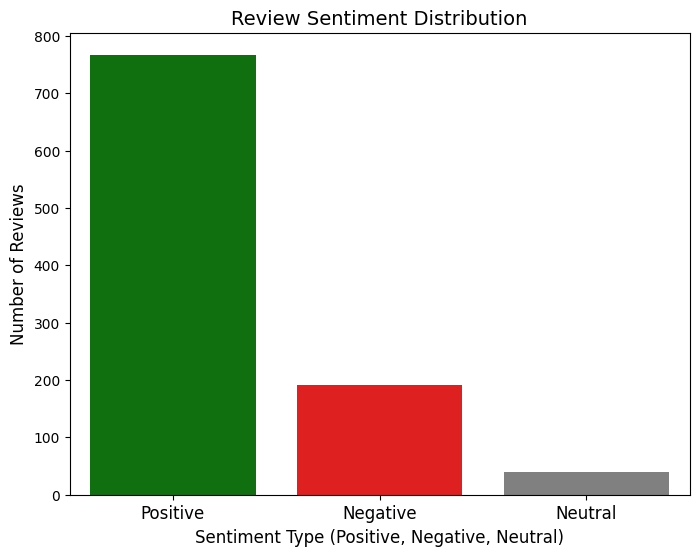

In [28]:
# استيراد المكتبات الخاصة بالرسم البياني
import matplotlib.pyplot as plt
import seaborn as sns

# حساب عدد التقييمات لكل نوع مشاعر
sentiment_counts = df['Sentiment_Label'].value_counts()

# رسم بياني باستخدام Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "gray"])

# إضافة عنوان وسم للرسم البياني
plt.title('Review Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment Type (Positive, Negative, Neutral)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# تغيير التسميات في المحور الأفقي
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Negative', 'Neutral'], fontsize=12)

# عرض الرسم البياني
plt.show()


In [30]:
# حفظ البيانات النظيفة إلى ملف CSV
df.to_csv('/content/cleaned_bank_reviews.csv', index=False)


In [31]:
from google.colab import files

# تحميل الملف إلى جهازك المحلي
files.download('/content/cleaned_bank_reviews.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>